# Polynomial Regression

polynomial (y = x**2 - 2x + 3)

- If we have a non-linear feature relationship (to label), e.g. when mapped out it makes a curve,
  if we were do do a regression line on this and get beta coefficients they would not be grat at predicitons.
- If we go to higher orders (power of 2 or 3 e.t.c) we can find more accurate beta coefficients.
- In certain situations it may be more reasonable to solve for a polynomial.
- interaction terms: what happend if two fatures are only significant when in sync with eachother.
    - perhaps newspaper advertising spend by ITSELF is not effective but really adds value if mixed with TV ads.
    
    
## How can we check for a synergy?

- Create a new feature that multiplies the two features together to create the interaction term
- sklearn does this all via an easy preprocessing library.

In [2]:
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('Advertising.csv')
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [4]:
# Sep X features and y label.
X = df.drop('sales', axis=1)

In [5]:
y = df['sales']

In [6]:
# Pre processing lib. (PolynomialFeatures)
from sklearn.preprocessing import PolynomialFeatures

In [7]:
polynomial_converter = PolynomialFeatures(degree=2, include_bias=False)

In [8]:
polynomial_converter.fit(X) # Just a feature converter

PolynomialFeatures(include_bias=False)

In [10]:
# Actualy transform it
polyfeatures = polynomial_converter.transform(X)

In [11]:
polyfeatures.shape

(200, 9)

In [13]:
polyfeatures[0] # TV, radio, newspaper, TV * radio, TV * NP, radio * NP, TV**2, radio**2, NP**2

array([2.301000e+02, 3.780000e+01, 6.920000e+01, 5.294601e+04,
       8.697780e+03, 1.592292e+04, 1.428840e+03, 2.615760e+03,
       4.788640e+03])

In [14]:
# Could also do fit_tranform(X)

## Now train test split using the transformed data.

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
# Run split on poly features!
X_train, X_test, y_train, y_test = train_test_split(
    polyfeatures,
    y,
    # Same params as other tests!
    test_size=0.3,
    random_state=42
)

In [18]:
from sklearn.linear_model import LinearRegression

In [19]:
model = LinearRegression()

In [20]:
model.fit(X_train, y_train) # Training regression model on 9 features not 3

LinearRegression()

In [21]:
test_preds = model.predict(X_test)

In [22]:
test_preds

array([17.22263805, 22.76431942, 20.34240311,  7.63823081, 24.43070212,
       12.62670906, 22.77581025,  8.17257308, 12.1434595 , 15.59295774,
        7.70321153,  8.13970713, 11.94050296,  6.00239435, 10.52156294,
       12.29998882,  6.73498649, 16.59405075, 10.56966577, 19.02896977,
       20.15426466, 13.93688799,  9.49270709, 22.09007022,  8.81726594,
        7.63831359, 22.36845761, 12.63105172, 10.12142254,  6.02913868,
       11.66988463, 10.06960308, 23.4843312 ,  9.85934368, 15.33869793,
       21.07332794, 10.9676273 , 20.14554654, 11.74470764,  6.4231513 ,
       10.71450186, 12.83429003,  9.18959984,  8.91317752, 11.87160951,
        6.97626924,  9.95713385, 14.69620775, 10.1058211 , 11.2550714 ,
       14.04197399, 12.14298425,  8.96411937,  7.54429236,  8.39739662,
       10.86854626,  9.89471268, 25.23373739,  6.79877024, 11.96203194])

In [24]:
model.coef_

array([ 0.05478172,  0.01311214,  0.01086391, -0.00011074,  0.00108048,
       -0.00010764,  0.00030191,  0.00017541,  0.00010075])

In [25]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [26]:
MAE = mean_absolute_error(y_test, test_preds) # Check the predicitons against the y test set.

In [27]:
MSE = mean_squared_error(y_test, test_preds)

In [28]:
RMSE = np.sqrt(MSE)

In [29]:
MAE

0.5905974833807945

In [30]:
MSE

0.523194494905531

In [31]:
RMSE # Performing almost twice as well as the normal LinearRegression model.

0.7233218473857478

In [32]:
model.coef_

array([ 0.05478172,  0.01311214,  0.01086391, -0.00011074,  0.00108048,
       -0.00010764,  0.00030191,  0.00017541,  0.00010075])

In [33]:
polyfeatures[0]

array([2.301000e+02, 3.780000e+01, 6.920000e+01, 5.294601e+04,
       8.697780e+03, 1.592292e+04, 1.428840e+03, 2.615760e+03,
       4.788640e+03])

In [34]:
X.iloc[0]

TV           230.1
radio         37.8
newspaper     69.2
Name: 0, dtype: float64

In [35]:
# Extremely small beta coefficients mean no correlation/signal
# Strong betas for interaction terms.

In [36]:
# Chosing higher polynomial degree
# We can check by writing a loop!

In [37]:
# create different order poly
# split the poly set into train and test
# fit on training data
# save RMSE for training and test set

# Plot the results (error vs polynomial ddegree order)

In [42]:
train_rmse_errors = []
test_rmse_errors = []

# kind of overkill for what we are doing.
for degree in range(1, 10):
    # Create feature converter.
    polyconverter = PolynomialFeatures(
        degree=degree, 
        include_bias=False
    )
    # Fit and transform the data.
    polyfeatures = polyconverter.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(
        polyfeatures,
        y,
        # Same params as other tests!
        test_size=0.3,
        random_state=42
    )
    
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    trainpreds = model.predict(X_train)
    testpreds = model.predict(X_test)
    
    train_rmse = np.sqrt(mean_squared_error(y_train, trainpreds))
    test_rmse = np.sqrt(mean_squared_error(y_test, testpreds))
    
    train_rmse_errors.append(train_rmse)
    test_rmse_errors.append(test_rmse)
    
    

In [43]:
train_rmse_errors

[1.574596830590544,
 0.5950712355838925,
 0.46887581118220883,
 0.3694689701771811,
 0.2438220731868701,
 0.20151320121803631,
 0.6233792218764097,
 0.1554634694131466,
 0.15882613620707328]

In [44]:
test_rmse_errors

[1.948537204344639,
 0.7233218473857478,
 0.5392350985681801,
 1.3032265963157175,
 5.946842935307123,
 26.38476839993306,
 599.3363123493482,
 2483.1346359034037,
 141973.33000831315]

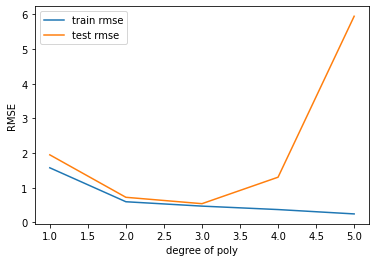

In [49]:
plt.plot(range(1, 6), train_rmse_errors[:5], label='train rmse')
plt.plot(range(1, 6), test_rmse_errors[:5], label='test rmse')

plt.xlabel('degree of poly')
plt.ylabel('RMSE')
plt.legend()

# In this case we would choose a degree of 2 or 3 as we don't want to risk entering the danger zone.

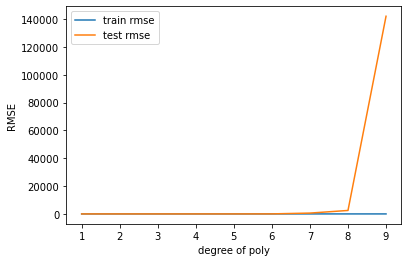

In [50]:
plt.plot(range(1, 10), train_rmse_errors, label='train rmse')
plt.plot(range(1, 10), test_rmse_errors, label='test rmse')

plt.xlabel('degree of poly')
plt.ylabel('RMSE')
plt.legend()

# Polynomial Model Regression Deployment

In [51]:
final_poly_converter = PolynomialFeatures(degree=3, include_bias=False)

In [52]:
final_model = LinearRegression()

In [53]:
#  Get converted data to polynomials.
full_converted_x = final_poly_converter.fit_transform(X) # Assuming we were satisfied with RMSE of test set.

# Fit model
final_model.fit(full_converted_x, y)

LinearRegression()

In [54]:
# Save both (poly converter + model)
from joblib import dump, load

In [55]:
dump(final_model, 'final_poly_model.joblib')
dump(final_poly_converter, 'final_poly_converter.joblib')

['final_poly_converter.joblib']

In [56]:
# Load em up!!
loaded_converter = load('final_poly_converter.joblib')
loaded_model = load('final_poly_model.joblib')

In [59]:
# It's too easy!
newcampaign = [[149, 22, 12]]

# Convert to 9 features (or however poly provides)
transformed_x_data = loaded_converter.fit_transform(newcampaign)

In [60]:
loaded_model.predict(transformed_x_data) # Booh yah!

array([14.64501014])